In [1]:
%store -r Modified_Total
%store -r comparison_total

## Introduction

The machine learning process of the data is comprised of linear regression and R2 analysis. Linear regression offers many advantages like the flexibility in working with smaller datasets, the ability to provide a fitted regression line showing relationship between independent and dependent variables, and the expediency of providing results. This linear regression is used to test whether the independent variables, which are the box office parameters, show correlation with the dependent variable of box office gross. The linear regression module could then be used to generate a linear equation with the box office parameters as variables.

After performing linear regression, R2 analysis was used in determining how closely the predicted data points adhere to the fitted regression. The independent and dependent variables are each split into training and testing portions with the training portions becoming fitted to a regressor. The regressor in turn is used for predicting the output dependent variable based test portion of the independent variable. These values are then used for computing R2 score and Residual Mean Square Error (RMSE); an R2 value closer to 1 would indicate close adherence to the fitted regression while a low RMSE score indicates that there is little deviation. R2 means error (RSME) of relatively low value would suggest that the predicted data reliably adheres to the fitted regression pattern.

## Hypothesis

The machine learning processes of linear regression and R^2 analysis will support the trends found in the EDA portions. The EDA show that total gross in China positively correlates with number of tickets sold, number of screens, and number of movies released. In contrast, the total gross in Japan only positively correlates with ticket prices. As such the linear regression models should yield a positive fitted linear regression with the parameters of China's data while yielding an negative fitted linear regression with Japan's data.

In [2]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
import scipy as sp
import pandas as pd
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression

In [3]:
years = Modified_Total['Year']
comparison_total['Year']=years
cols = list(comparison_total.columns)
cols = [cols[-1]] + cols[:-1]
total = comparison_total[cols]

In [4]:
total.head()

,Year,Total Gross in China (Millions USD),Total Gross in Japan (Millions USD),Tickets Sold in China (Millions),Tickets Sold in Japan (Millions),Number of Screens in China,Number of Screens in Japan,Ticket Price in China (USD),Ticket Price in Japan (USD),Movies Released in China,Movies Released in Japan
0,2012,2658.65,2252.89,463.26,155,13118,3290,9.94,17.01,394,983
1,2013,3549.43,1845.48,614.24,156,18195,3318,9.97,17.74,345,1117
2,2014,4746.84,1727.44,834.31,161,23592,3364,9.94,16.65,389,1184
3,2015,6771.67,1805.26,1260.89,167,31627,3437,9.86,16.87,522,1136
4,2016,6549.70,2013.58,1373.63,180,41056,3472,8.92,17.81,531,1149


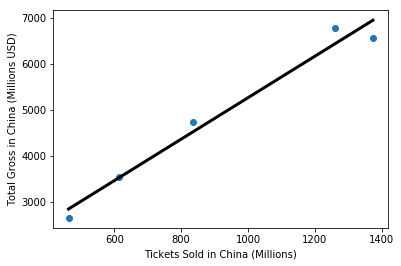

The Linear Regression Score: 0.9422062364661908
R^2 Value: 0.8364898234685938
Root Mean Squared Error: 606.6004630703245
Cross Validation Score: -0.11640031965408675


In [5]:
# Fit and Predict for Regression in China Tickets
reg = LinearRegression()

y1 = total['Total Gross in China (Millions USD)']
X1 = total['Tickets Sold in China (Millions)']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Tickets Sold in China (Millions)")
plt.ylabel("Total Gross in China (Millions USD)")
plt.show()

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

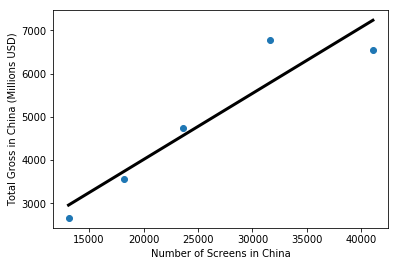

The Linear Regression Score: 0.6195207368841678
R^2 Value: -0.09778309450731104
Root Mean Squared Error: 1571.768616814136
Cross Validation Score: -2.5708029454259185


In [9]:
# Fit and Predict for Regression in China Screens
reg = LinearRegression()

y1 = total['Total Gross in China (Millions USD)']
X1 = total['Number of Screens in China']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Number of Screens in China")
plt.ylabel("Total Gross in China (Millions USD)")
plt.show()

# Training and Testing Ticket
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

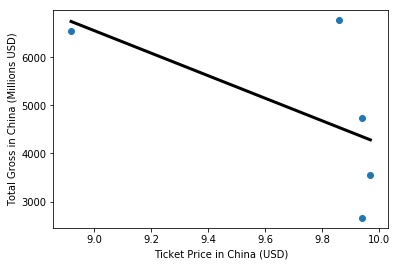

The Linear Regression Score: -99.83812274525361
R^2 Value: -291.69551086446387
Root Mean Squared Error: 25664.828977831112
Cross Validation Score: -12.967195226652656


In [10]:
# Fit and Predict for Regression in China Ticket Prices
reg = LinearRegression()

y1 = total['Total Gross in China (Millions USD)']
X1 = total['Ticket Price in China (USD)']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Ticket Price in China (USD)")
plt.ylabel("Total Gross in China (Millions USD)")
plt.show()

# Training and Testing Ticket
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

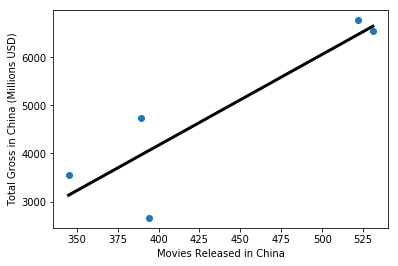

The Linear Regression Score: 0.7414266728915307
R^2 Value: 0.7881280511994099
Root Mean Squared Error: 690.5053923047656
Cross Validation Score: -3.8714301453297346


In [11]:
# Fit and Predict for Regression in China Movie releases
reg = LinearRegression()

y1 = total['Total Gross in China (Millions USD)']
X1 = total['Movies Released in China']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Movies Released in China")
plt.ylabel("Total Gross in China (Millions USD)")
plt.show()

# Training and Testing Ticket
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

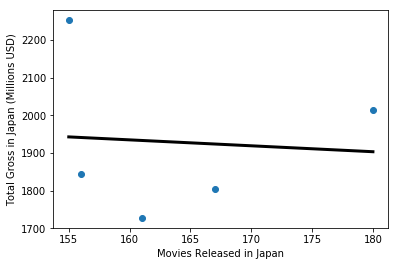

The Linear Regression Score: -3.363176836538384
R^2 Value: -48.74082467784784
Root Mean Squared Error: 592.7809091108195
Cross Validation Score: -17.577592850648017


In [12]:
# Fit and Predict for Ticket Sold Japan
reg = LinearRegression()

y1 = total['Total Gross in Japan (Millions USD)']
X1 = total['Tickets Sold in Japan (Millions)']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Movies Released in Japan")
plt.ylabel("Total Gross in Japan (Millions USD)")
plt.show()


# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

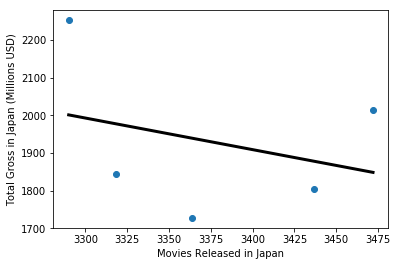

The Linear Regression Score: -0.6149437111827747
R^2 Value: -14.749812076815635
Root Mean Squared Error: 333.5611065606817
Cross Validation Score: -16.259412952762855


In [13]:
# Fit and Predict for Number of Screens in Japan
reg = LinearRegression()

y1 = total['Total Gross in Japan (Millions USD)']
X1 = total['Number of Screens in Japan']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Movies Released in Japan")
plt.ylabel("Total Gross in Japan (Millions USD)")
plt.show()

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

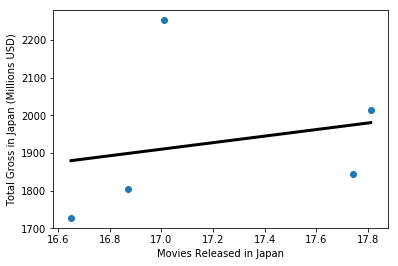

The Linear Regression Score: -17.588380586793598
R^2 Value: -226.4521765642944
Root Mean Squared Error: 1267.6015638800866
Cross Validation Score: -75.46198533463092


In [14]:
# Fit and Predict for Ticket Price in Japan
reg = LinearRegression()

y1 = total['Total Gross in Japan (Millions USD)']
X1 = total['Ticket Price in Japan (USD)']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Movies Released in Japan")
plt.ylabel("Total Gross in Japan (Millions USD)")
plt.show()


# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

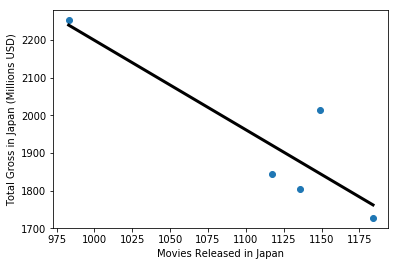

The Linear Regression Score: 0.7207828378038779
R^2 Value: -2.3595991987850384
Root Mean Squared Error: 154.057005614464
Cross Validation Score: -2.8288964718060927


In [15]:
# Fit and Predict for Movies Released in Japan
reg = LinearRegression()

y1 = total['Total Gross in Japan (Millions USD)']
X1 = total['Movies Released in Japan']
y1 = y1.values.reshape(-1,1)
X1 = X1.values.reshape(-1,1)

prediction_space = np.linspace(min(X1), max(X1)).reshape(-1,1)
reg.fit(X1,y1)

y_pred = reg.predict(prediction_space)
plt.scatter(X1,y1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Movies Released in Japan")
plt.ylabel("Total Gross in Japan (Millions USD)")
plt.show()

# Training and Testing Movies Released in Japan
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

In [24]:
# Total China
X_China = total[['Tickets Sold in China (Millions)','Number of Screens in China',
                 'Ticket Price in China (USD)','Movies Released in China']]
y_China = total['Total Gross in China (Millions USD)']
reg = LinearRegression()

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_China, y_China, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
print("Intercept: {}".format(reg.intercept_))
print("Coefficients: {}".format(reg.coef_))
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


# Three-Fold Cross-Validation Scores
cvscores = cross_val_score(reg, X1, y1, cv = 3)

print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

Intercept: -549.272653986859
Coefficients: [ 1.54676735e+00  1.45282879e-01 -8.68925162e-04  1.48618030e+00]
R^2 Value: 0.29634059142470714
Root Mean Squared Error: 1258.3793800675037
Cross Validation Score: -2.8288964718060927


China Box Office

*Total Gross* = 1.5468 x *Tickets Sold (Millions)* + 0.1453 x *Number of Screens* - 0.0009 x *Ticket Price (USD)* + 1.4862 *Movies Released* - 549.2727

In [25]:
# Total Japan
X_Japan = total[['Tickets Sold in Japan (Millions)',
'Number of Screens in Japan','Ticket Price in Japan (USD)',
'Movies Released in Japan']]
y_Japan = total['Total Gross in Japan (Millions USD)'] 
reg = LinearRegression()

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_Japan, y_Japan, random_state=42)
reg.fit(X_train,y_train)
print("Intercept: {}".format(reg.intercept_))
print("Coefficients: {}".format(reg.coef_))

cvscores = cross_val_score(reg, X_Japan, y_Japan, cv = 3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#print("The Linear Regression Score: {}".format(reg.score(X1, y1)))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))
print("Cross Validation Score: {}".format(np.mean(cvscores)))

Intercept: 6356.877350972771
Coefficients: [-0.04201082 -0.52220287  0.00488095 -2.42066251]
R^2 Value: -4.064383860960382
Root Mean Squared Error: 4626.958841400355
Cross Validation Score: -3.4287521541546337


Japan Box Office

*Total Gross* = -0.0420 x *Tickets Sold (Millions)* - 0.5222 x *Number of Screens* + 0.0049 x *Ticket Price (USD)* - 2.4207 *Movies Released in Japan* - 6356.8774

## Results and Summary

For the machine learning portion, linear regression was performed on individual and aggragrate parameters for both countries. Regression for individual parameters seem to confirm that the number of tickets sold, number of screens, and number of movies released correlate with a positive increase in box office in China. Conversely, ticket price seems to induce a decrease in box office. Aggregate regression for China's parameters show that the positive parameters increase with box office while negative parameter (ticket price) decreases with box office. Conversely, for Japan, both the individual and aggregate regression show that the number of tickets sold, number of screens, and number of movies released decreases with box office while ticket prices increases with box office. The linear equation for each country's box office, which are calculated from the coefficients of the aggregate regression, show the hypothetical box office yields.

To determine the reliability of the linear regression, root mean square error (RMSE) was used in aggregate linear regression. The RMSE would determine the degree by which the residual of predicted values would differ from the main regression. The RMSE for China's aggregate box office was 1258.38 while the RMSE for Japan's was 4626.96. While the RMSE values are relatively large and a smaller one would've been more preferable, these RMSE values are chosen as a smaller values would've lead to overfitting and skewed coefficients. Since the Japan's RMSE is larger than China's, it would suggest that the machine learning for the China data is more reliable.
